In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

%matplotlib inline

In [ ]:
wine = pd.read_csv('/content/wine rate.zip')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


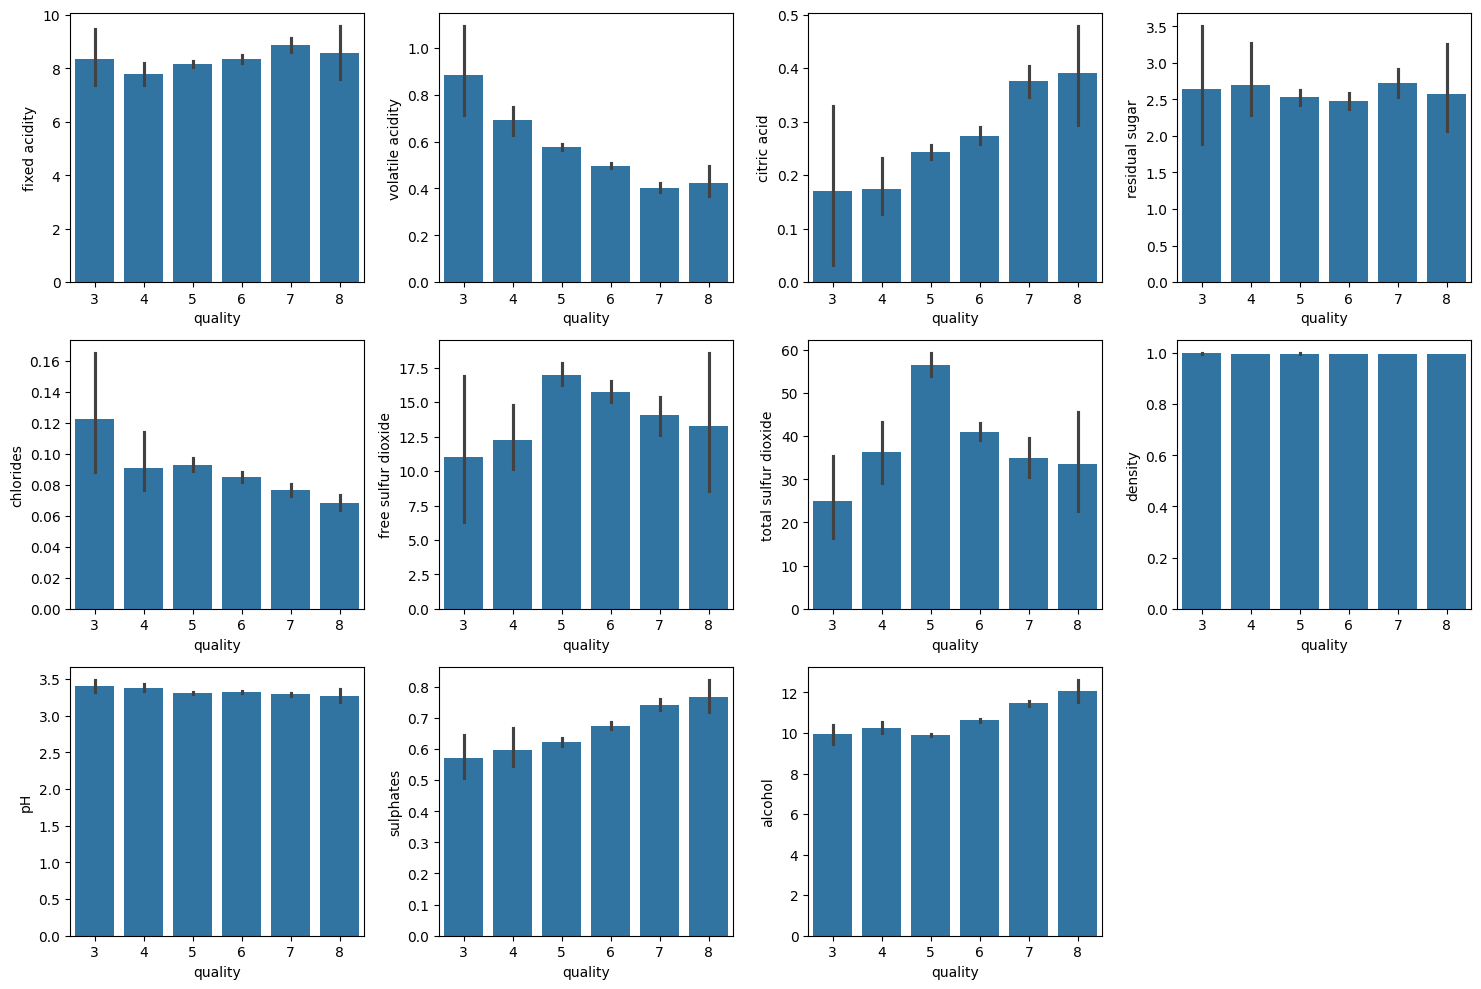

In [ ]:
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=wine)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=wine)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=wine)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=wine)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=wine)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=wine)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=wine)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=wine)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=wine)

plt.tight_layout()

In [ ]:
wine['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [ ]:
ranges = (2,6.5,8)
groups = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=ranges,labels=groups)

In [ ]:
le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [ ]:
good_quality = wine[wine['quality']==1]
bad_quality = wine[wine['quality']==0]

bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:217]

new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1114,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,0
1289,7.0,0.60,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2,0
457,9.2,0.63,0.21,2.7,0.097,29.0,65.0,0.99880,3.28,0.58,9.6,0
618,11.4,0.46,0.50,2.7,0.122,4.0,17.0,1.00060,3.13,0.70,10.2,0
1344,11.5,0.42,0.48,2.6,0.077,8.0,20.0,0.99852,3.09,0.53,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,6.3,0.36,0.19,3.2,0.075,15.0,39.0,0.99560,3.56,0.52,12.7,0
1537,5.4,0.58,0.08,1.9,0.059,20.0,31.0,0.99484,3.50,0.64,10.2,0
1460,6.4,0.42,0.09,2.3,0.054,34.0,64.0,0.99724,3.41,0.68,10.4,0
1450,7.2,0.37,0.32,2.0,0.062,15.0,28.0,0.99470,3.23,0.73,11.3,1


In [ ]:
new_df['quality'].value_counts()


quality
0    217
1    217
Name: count, dtype: int64

In [ ]:
new_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.552336
sulphates               0.312433
citric acid             0.260642
fixed acidity           0.148843
residual sugar          0.112464
pH                     -0.029241
free sulfur dioxide    -0.092720
chlorides              -0.167305
density                -0.192455
total sulfur dioxide   -0.199465
volatile acidity       -0.391528
Name: quality, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X = new_df.drop('quality',axis=1)
y = new_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(X_train, y_train)

print('Best parameters --> ', grid_rf.best_params_)

# Wine Quality Prediction
pred = grid_rf.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

Best parameters -->  {'n_estimators': 400}
[[53 12]
 [ 9 57]]


              precision    recall  f1-score   support

           0       0.85      0.82      0.83        65
           1       0.83      0.86      0.84        66

    accuracy                           0.84       131
   macro avg       0.84      0.84      0.84       131
weighted avg       0.84      0.84      0.84       131



0.8396946564885496
